In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

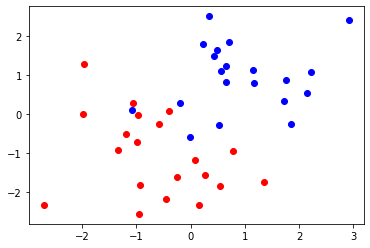

In [2]:
# 生成两类数据
# data1和data2是数据组成相同但顺序不同的数据集
A_mean = [1,1]
A_cov = [[1,0],[0,1]]

B_mean = [-1,-1]
B_cov = [[1,0],[0,1]]

A1_x = np.random.multivariate_normal(A_mean, A_cov, 10)
A2_x = np.random.multivariate_normal(A_mean, A_cov, 10)
B1_x = np.random.multivariate_normal(B_mean, B_cov, 10)
B2_x = np.random.multivariate_normal(B_mean, B_cov, 10)

A_x = np.concatenate([A1_x, A2_x])
B_x = np.concatenate([B1_x, B2_x])
data1 = np.concatenate([A1_x, B1_x, A2_x, B2_x])
data2 = np.concatenate([A1_x, A2_x, B1_x, B2_x])

A_x1, A_x2 = A_x.T
B_x1, B_x2 = B_x.T

plt.scatter(A_x1, A_x2, c='b')
plt.scatter(B_x1, B_x2, c='r')
axes = plt.gca()

In [3]:
# 初始化theta
theta1 = np.zeros(2)
theta2 = np.zeros(2)

# 初始化y1和y2
y1 = [1] * 10 + [-1] * 10 + [1] * 10 + [-1] * 10 
y2 = [1] * 20 + [-1] * 20

count1: 6
count2: 8


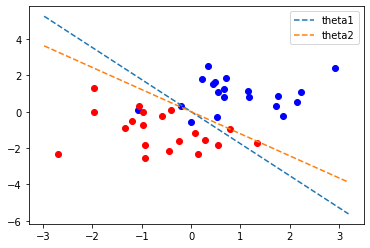

In [4]:
# 对data1计算错误的点
count1 = 0
for i in range(len(data1)):
    x = data1[i]
    y_hat = np.sign(np.dot(theta1, x))
    if y_hat != y1[i]:
        theta1 += y1[i] * x
        count1 += 1
        
count2 = 0
for i in range(len(data2)):
    x = data2[i]
    y_hat = np.sign(np.dot(theta2, x))
    if y_hat != y2[i]:
        theta2 += y2[i] * x
        count2 += 1
        
print("count1:",count1)
print("count2:",count2)

x1_vals = np.array(axes.get_xlim())

# 实际上是x*theta = 0，等价变形即得到x2 * theta[1] + x1 * theta[0] = 0
x2_vals1 = -1 * x1_vals * theta1[0] /  theta1[1]
x2_vals2 = -1 * x1_vals * theta2[0] /  theta2[1]

plt.scatter(A_x1, A_x2, c='b')
plt.scatter(B_x1, B_x2, c='r')

plt.plot(x1_vals, x2_vals1, '--')
plt.plot(x1_vals, x2_vals2, '--')
plt.legend(["theta1", "theta2"])